# DSC-530 Exploratory Data Analysis
## Final Project -  An Analysis of Tropical Storms from 1851-2015

By Ambrose M Malagon Cordero

 ### Data Sets 

The following Data Sets where used for this analysis:
* ”atlantic.csv” file from the Hurricanes and Typhoons, 1851-2014 dataset.
    Author: NOAA – link: https://www.kaggle.com/noaa/hurricane-database
* ”GlobalTemperatures.csv” file from the Climate Change: Earth Surface Temperature Data - Exploring global temperatures since 1750 dataset.
    Author: Berkeley Earth – link: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalTemperatures.csv

#### ”atlantic.csv”

This data contains 49,106 observations from starting from 1851 of recorded tropical storm information in a 6 hour increment, per day per. Variables initially chosen from this dataset:
* ID – Unique identifier per phenomenon
* Date – Integer that represents the date in YYYYMMDD format
* Event – Coded as follows:
    * C – Closest approach to a coast, not followed by a landfall 
    * G – Genesis 
    * I – An intensity peak in terms of both pressure and wind 
    * L – Landfall (center of system crossing a coastline) 
    * P – Minimum in central pressure 
    * R – Provides additional detail on the intensity of the cyclone when rapid changes are underway 
    * S – Change of status of the system 
    * T – Provides additional detail on the track (position) of the cyclone 
    * W – Maximum sustained wind speed 
* Status – Status of System:
    * TD – Tropical cyclone of tropical depression intensity (< 34 knots) 
    * TS – Tropical cyclone of tropical storm intensity (34-63 knots) 
    * HU – Tropical cyclone of hurricane intensity (> 64 knots) 
    * EX – Extratropical cyclone (of any intensity) 
    * SD – Subtropical cyclone of subtropical depression intensity (< 34 knots) 
    * SS – Subtropical cyclone of subtropical storm intensity (> 34 knots) 
    * LO – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity) 
    * WV – Tropical Wave (of any intensity) 
    * DB – Disturbance (of any intensity) 
* Maximum Wind – defined as the maximum 1-min average wind associated with the tropical cyclone at an elevation of 10 m with an unobstructed exposure - knots. 


#### ”GlobalTemperatures.csv”

This data set contains a total 3,192 observations, which constitute of weather averages by month per year. The variables chosen from this dataset:
* LandAverageTemperature – In Celsius
* LandAndOceanAverageTemperature – In Celsius.


__________________________________________________________________________________________________________________
### Python Modules

For this analysis, we are going to import the following modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import norm
import scipy as sp
from scipy.stats.stats import pearsonr 
from scipy.stats.stats import spearmanr
from scipy.stats import ttest_ind
from statistics import stdev
from scipy.stats import chi2_contingency
from scipy import stats
import decimal
import statsmodels.formula.api as smf
from scipy.stats import pareto

------------------------------------------

### Data Preparation

In [2]:
# Exporting 'atlantic.csv' and adding the count column equals to 1, which we will use to determine to count 
# the number of days an event was active. 
df_at = pd.read_csv('atlantic.csv')
df_at['count'] = 1

# First Grouping: 
# df_at by ID, Date and Status and get the mean of the remaining variables and storing the resulting data-
# frame as dt_atmean
df_atmean = df_at.groupby(['ID', 'Date','Status']).mean()
df_atmean = df_atmean.reset_index()

# Add the 'dt' field, which we will use later to join
df_atmean['dt'] = df_atmean['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_atmean['year'] = df_atmean['dt'].dt.year
df_atmean['month'] = df_atmean['dt'].values.astype('datetime64[M]')

# Sampe of first 5 rows
df_atmean.head()

,ID,Date,Status,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,...,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,count,dt,year,month
0,AL011851,18510625,HU,1140.0,80.000000,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1851-06-25,1851,1851-06-01
1,AL011851,18510626,HU,0.0,70.000000,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1851-06-26,1851,1851-06-01
2,AL011851,18510626,TS,1200.0,56.666667,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1851-06-26,1851,1851-06-01
3,AL011851,18510627,TS,900.0,42.500000,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1851-06-27,1851,1851-06-01
4,AL011851,18510628,TS,0.0,40.000000,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0,1851-06-28,1851,1851-06-01


In [3]:
# Second Grouping
# Grouping df_at by ID and Date to get the total dayes each hurricane lasted and storing it as days_count.
df_days = df_at.groupby(['ID', 'Date']).mean()
df_days = df_days.reset_index()
df_days['dt'] = df_days['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_days['year'] = df_days['dt'].dt.year
days_count = df_days.groupby(['year','ID']).sum()
days_count = days_count.reset_index()

# Sampe of first 5 rows
days_count.head()

,year,ID,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,count
0,1851,AL011851,74042506,2940.0,222.5,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,4.0
1,1851,AL021851,18510705,1200.0,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0
2,1851,AL031851,18510710,1200.0,50.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0
3,1851,AL041851,222129858,11040.0,772.5,-11988.0,-11988.0,-11988.0,-11988.0,-11988.0,-11988.0,-11988.0,-11988.0,-11988.0,-11988.0,-11988.0,-11988.0,-11988.0,12.0
4,1851,AL051851,74043658,3600.0,200.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,-3996.0,4.0


In [4]:
# Next is the Weather Data 
#Exporting 'GlobalTemperatures.csv' and converting the dt column from text to datetime. 
df_wt = pd.read_csv('GlobalTemperatures.csv')
df_wt['dt'] = pd.to_datetime(df_wt['dt'])
# Create a mask that will be used to filter down all of the records in df_wt that correspond with those in df_at
mask = (df_wt['dt'] >= '1851-06-01') & (df_wt['dt'] <= '2015-11-01')
df_wt = df_wt.loc[mask]
# Get the month variable from df_mean to filter down later to the specific months captured in atlantic.csv data. 
at_month = df_atmean.filter(['month'], axis = 1)
at_month = at_month.drop_duplicates()
at_month.columns = ['dt']

In [5]:
# Functions that transforms the chosen variables from Celsius to Fahrenheit:
def celsius_to_fahrenheit1(df):
    val = (df['LandAverageTemperature'] * 9/5) +32
    return val

def celsius_to_fahrenheit2(df):
    val = (df['LandMaxTemperature'] * 9/5) +32
    return val

def celsius_to_fahrenheit3(df):
    val = (df['LandAndOceanAverageTemperature'] * 9/5) +32
    return val

In [6]:
# Run the functions to get the converted values:
df_wt['LandAverageTemperature_F'] = df_wt.apply(celsius_to_fahrenheit1, axis=1)
df_wt['LandMaxTemperature_F'] = df_wt.apply(celsius_to_fahrenheit2, axis=1)
df_wt['LandAndOceanAverageTemperature_F'] = df_wt.apply(celsius_to_fahrenheit3, axis=1)

#Left join on at_month to capture again get all of the variables we need from df_wt
df_wtf = pd.merge(at_month,
                 df_wt[['dt','LandAverageTemperature_F', 'LandMaxTemperature_F', 'LandAndOceanAverageTemperature_F']],
                 on='dt', 
                 how='left')

df_wtf.head()

,dt,LandAverageTemperature_F,LandMaxTemperature_F,LandAndOceanAverageTemperature_F
0,1851-06-01,56.1524,63.1184,61.6928
1,1852-08-01,55.9472,63.6206,61.8188
2,1853-08-01,57.1154,66.7544,62.2202
3,1854-06-01,55.0922,64.7384,61.3148
4,1855-08-01,56.3846,66.2216,62.0330


This initial data preparation will now allow us to move to take an in-depth look at our chosen variables.
____________________________________________________

### Variables - Histograms and other Statistics

#### Date

Text(0.5, 0.95, 'Weather Events Counted by Day')

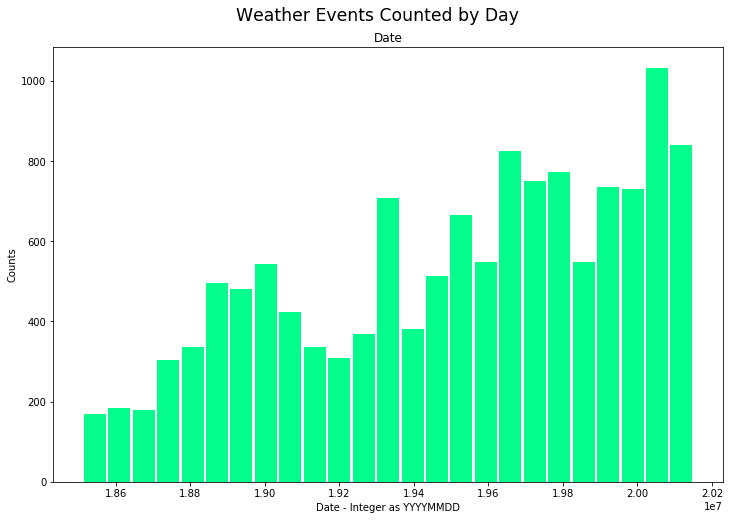

In [7]:
# Let's take a look at the count of days were a Tropical Storm was recorded
fp = df_days.hist(column='Date', bins=25, grid=False, figsize=(12,8), color='#03fc8c', zorder=2, rwidth=0.9)
plt.xlabel("Date - Integer as YYYYMMDD")
plt.ylabel("Counts")
plt.suptitle('Weather Events Counted by Day', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

In [18]:
print("Mean: ",df_days.Date.mean())
print("Mode: ",df_days.Date.mode())
print("Standard Deviation: ",df_days.Date.std())
print("Variance: ",df_days.Date.var())
print("Maximum Value: ",df_days.Date.max())
print("Minimum Value: ",df_days.Date.min())

Mean:  19507181.666869026
Mode:  0    19710911
dtype: int64
Standard Deviation:  442800.36120718933
Variance:  196072159885.21735
Maximum Value:  20151113
Minimum Value:  18510625


From 1851, the number of days where a Tropical Storm event occured do flutuate but there is an evident increase over time.

#### Average of Maximum Winds Sustained per Event

Text(0.5, 0.95, 'Maximum Winds Sustained by Day')

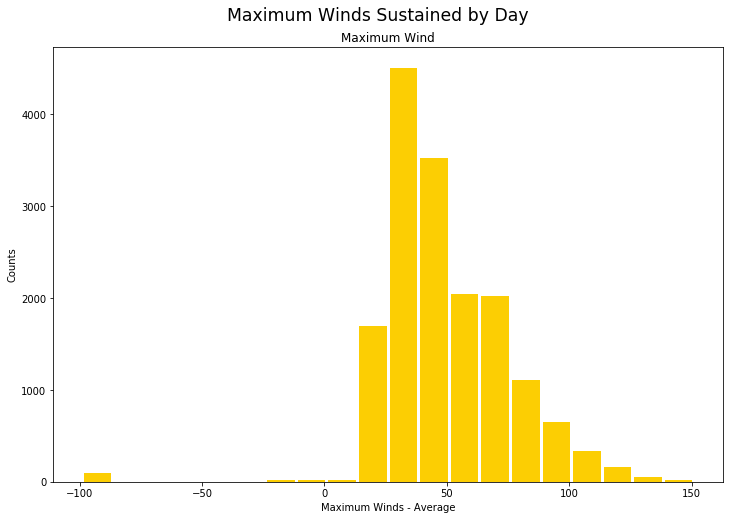

In [14]:
fp = df_atmean.hist(column='Maximum Wind', bins=20, grid=False, figsize=(12,8), color='#fcce03', zorder=2, rwidth=0.9)
plt.xlabel("Maximum Winds - Average")
plt.ylabel("Counts")
plt.suptitle('Maximum Winds Sustained by Day', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

In [17]:
print("Mean: ",df_atmean['Maximum Wind'].mean())
print("Mode: ",df_atmean['Maximum Wind'].mode())
print("Standard Deviation: ",df_atmean['Maximum Wind'].std())
print("Variance",df_atmean['Maximum Wind'].var())
print("Maximum Value: ",df_atmean['Maximum Wind'].max())
print("Minimum Value: ",df_atmean['Maximum Wind'].min())

Mean:  49.25978241155158
Mode:  0    30.0
dtype: float64
Standard Deviation:  25.74958382435838
Variance 663.0410671276586
Maximum Value:  151.0
Minimum Value:  -99.0


The majority of the observations do not pass the 50 mph wind speed per day threshold. The -99 values represent non captured values. I suppose these could be excluded, however, I left them in because I wanted to get a sense of how much data was actually left out. We do have some observations that have are in the negative values. Since they represent a small amount of the population, It might be OK to exclude these.

#### Minimum Pressure

Text(0.5, 0.95, 'Minimum Storm Pressure by Day')

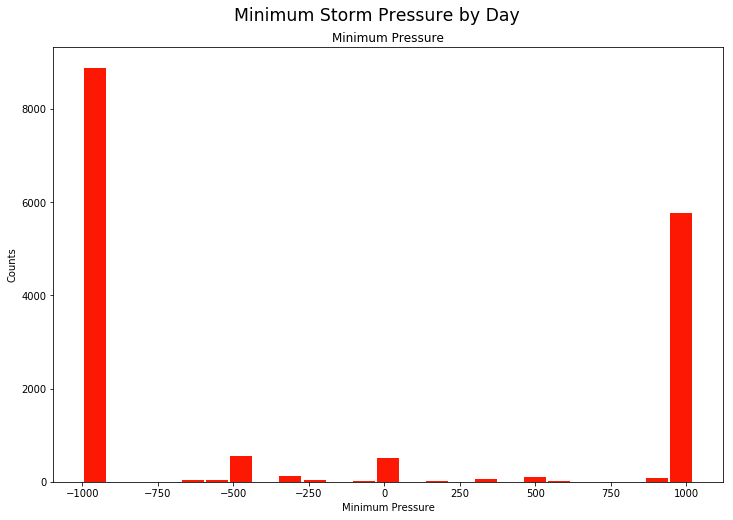

In [16]:
fp = df_atmean.hist(column='Minimum Pressure', bins=25, grid=False, figsize=(12,8), color='#fc1803', zorder=2, rwidth=0.9)
plt.xlabel("Minimum Pressure")
plt.ylabel("Counts")
plt.suptitle('Minimum Storm Pressure by Day', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

In [19]:
print("Mean: ",df_atmean['Minimum Pressure'].mean())
print("Mode: ",df_atmean['Minimum Pressure'].mode())
print("Standard Deviation: ",df_atmean['Minimum Pressure'].std())
print("Variance: ",df_atmean['Minimum Pressure'].var())
print("Maximum Value: ",df_atmean['Minimum Pressure'].max())
print("Minimum Value: ",df_atmean['Minimum Pressure'].min())

Mean:  -205.4407953475038
Mode:  0   -999.0
dtype: float64
Standard Deviation:  934.1530368840592
Variance:  872641.8963197106
Maximum Value:  1024.0
Minimum Value:  -999.0


-999 represents non-captured values. Due to large amount of non-captured values, this variable might not be as useful as I initially thought. 

#### Land Average Temperatures

Text(0.5, 0.95, 'Monthly Average Land Temperatures')

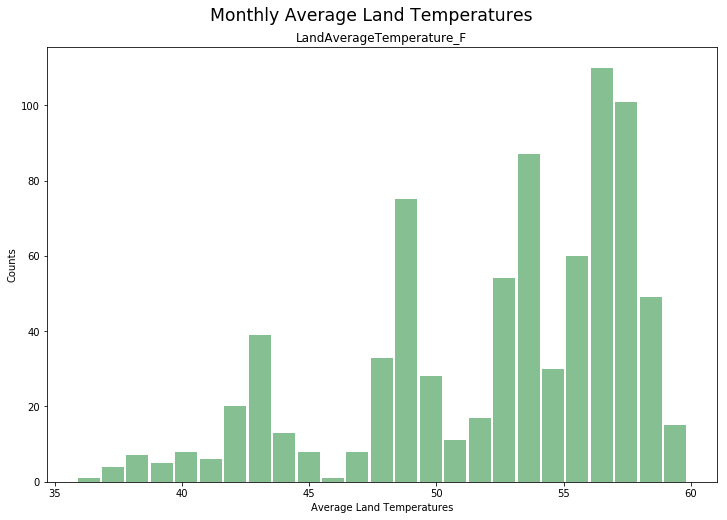

In [21]:
fp = df_wtf.hist(column='LandAverageTemperature_F', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.xlabel("Average Land Temperatures")
plt.ylabel("Counts")
plt.suptitle('Monthly Average Land Temperatures', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

In [22]:
print("Mean: ",df_wtf.LandAverageTemperature_F.mean())
print("Mode: ",df_wtf.LandAverageTemperature_F.mode())
print("Standard Deviation: ",df_wtf.LandAverageTemperature_F.std())
print("Variance: ",df_wtf.LandAverageTemperature_F.var())
print("Maximum Value: ",df_wtf.LandAverageTemperature_F.max())
print("Minimum Value: ",df_wtf.LandAverageTemperature_F.min())

Mean:  52.43197088607594
Mode:  0    54.0446
1    58.5356
dtype: float64
Standard Deviation:  5.319309991885447
Variance:  28.29505878977235
Maximum Value:  59.867599999999996
Minimum Value:  35.8484


I found it interesting that we had Observations where the Average Land Temperature on a Global Scale was around 35 degrees Fahrenheit.

In [24]:
#### Land And Ocean Average Temperatures

Text(0.5, 0.95, 'Monthly Average Land and Ocean Temperatures during Weather Phenomenon')

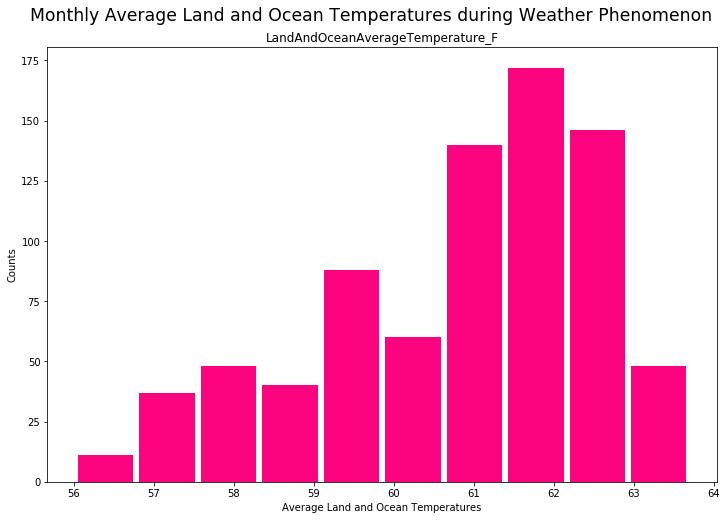

In [26]:
fp = df_wtf.hist(column='LandAndOceanAverageTemperature_F', bins=10, grid=False, figsize=(12,8), color='#fc0380', zorder=2, rwidth=0.9)
plt.xlabel("Average Land and Ocean Temperatures")
plt.ylabel("Counts")
plt.suptitle('Monthly Average Land and Ocean Temperatures during Weather Phenomenon', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

In [27]:
print("Mean: ",df_wtf.LandAndOceanAverageTemperature_F.mean())
print("Mode: ",df_wtf.LandAndOceanAverageTemperature_F.mode())
print("Standard Deviation: ",df_wtf.LandAndOceanAverageTemperature_F.std())
print("Variance: ",df_wtf.LandAndOceanAverageTemperature_F.var())
print("Maximum Value: ",df_wtf.LandAndOceanAverageTemperature_F.max())
print("Minimum Value: ",df_wtf.LandAndOceanAverageTemperature_F.min())

Mean:  60.83003265822783
Mode:  0    61.6928
dtype: float64
Standard Deviation:  1.721141988207503
Variance:  2.962329743570876
Maximum Value:  63.699799999999996
Minimum Value:  56.013799999999996


The average Land and Ocean Global Temperatures ranges between 56 and 64 degrees Fahrenheit. While one could conclude that this range is perhaps the ideal temperatures that help foster these observations. However, more data and an in-depth analysis before we can even begin to ponder such a hypothesis.

_____________________________________
### Probability Mass Functions

#### First Scenario - Increased Number of Storms 

In [29]:
# Group Atlantic Storms - Count by Year

at_filter = df_at.filter(['ID','Date','count'], axis = 1)
at_filter['dt'] = at_filter['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
at_filter['year'] = at_filter['dt'].dt.year
at_filter = at_filter.filter(['ID','year','count'], axis = 1)

In [30]:
# Function to help catogrize the Hurricane between two groups: 1851-1933 or group 1 and 1934 to 2015 or group 2.
def cat(row):
    if row['year'] > 1850 and row['year'] < 1934:
        val = '1'
    elif row['year'] > 1933 and row['year'] < 2016:
        val = '2'
    else:
        val = -1
    return val

In [31]:
# Drop duplicate values, group by year and sum all observations, and apply the cat function to add the cycle 
# column the the dataframe.
at_filter = at_filter.drop_duplicates()
at_filter = at_filter.groupby(['year']).sum()
at_filter = at_filter.reset_index()
at_filter['cycle'] = at_filter.apply(cat, axis=1)
at_filter.head()

,year,count,cycle
0,1851,6,1
1,1852,5,1
2,1853,8,1
3,1854,5,1
4,1855,5,1


In [32]:
# Filter group 1 and 2 to their respective dataframes.
at_cycle1 = at_filter[at_filter.cycle == '1']
at_cycle2 = at_filter[at_filter.cycle == '2']

In [33]:
# Calculate the PMF
cycle1 = pd.DataFrame(at_cycle1['count'].value_counts())
cycle1['value'] = cycle1.index
cycle1['pmf'] = cycle1['count']/cycle1['count'].sum()

cycle2 = pd.DataFrame(at_cycle2['count'].value_counts())
cycle2['value'] = cycle2.index
cycle2['pmf'] = cycle2['count']/cycle2['count'].sum()

Text(0.5, 0.95, '1851-1933 - Storms by Year')

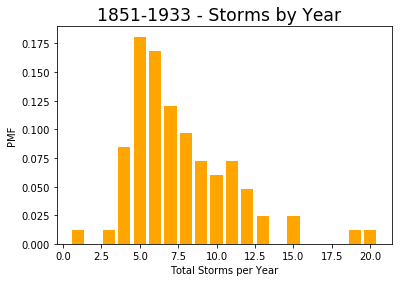

In [39]:
# Plotting PMF for group 1
plt.bar(cycle1['value'], cycle1['pmf'], color = 'orange')
plt.xlabel("Total Storms per Year")
plt.ylabel("PMF")
plt.suptitle('1851-1933 - Storms by Year', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

Text(0.5, 0.95, '1934-2015 - Storms by Year')

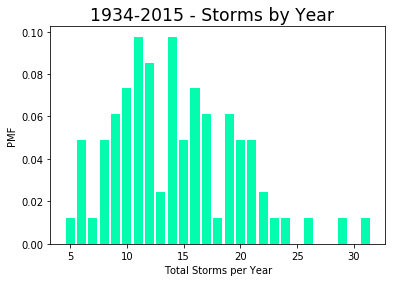

In [40]:
# Plotting PMF for group 2
plt.bar(cycle2['value'], cycle2['pmf'], color = '#03fcad')
plt.xlabel("Total Storms per Year")
plt.ylabel("PMF")
plt.suptitle('1934-2015 - Storms by Year', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

Text(0.5, 0.95, 'Storms by Year Comparison')

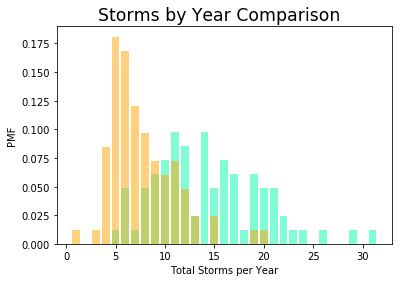

In [46]:
# Comparison between group 1 and 2
fig = plt.figure()
ax = fig.add_subplot(111)
plt.bar(cycle2['value'], cycle2['pmf'], alpha = 0.5,color = '#03fcad')
plt.bar(cycle1['value'], cycle1['pmf'], alpha = 0.5, color = 'orange')
plt.xlabel("Total Storms per Year")
plt.ylabel("PMF")
plt.suptitle('Storms by Year Comparison', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

For observations occurring between 1934 to 2015 had higher probabilities for more storms per year than those that occured between 1851 to 1933.

#### Second Scenario - Land and Ocean Average Temperatures

In [48]:
# We filter dt_wtf to just the dt and LandandOceanAverageTemperature_F variables and apply the cat function to 
# to group the the observations like we did earlier. 
wt_filter = df_wtf.filter(['dt','LandAndOceanAverageTemperature_F'], axis = 1)
wt_filter['year'] = wt_filter['dt'].dt.year
wt_filter['cycle'] = wt_filter.apply(cat, axis=1)

# Filter group 1 and 2 to their respective dataframes.
wt_cycle1 = wt_filter[wt_filter.cycle == '1']
wt_cycle2 = wt_filter[wt_filter.cycle == '2']

# Calculate PMF.
wcycle1 = pd.DataFrame(wt_cycle1['LandAndOceanAverageTemperature_F'].value_counts())
wcycle1['value'] = wcycle1.index
wcycle1['pmf'] = wcycle1['LandAndOceanAverageTemperature_F']/wcycle1['LandAndOceanAverageTemperature_F'].sum()

wcycle2 = pd.DataFrame(wt_cycle2['LandAndOceanAverageTemperature_F'].value_counts())
wcycle2['value'] = wcycle2.index
wcycle2['pmf'] = wcycle2['LandAndOceanAverageTemperature_F']/wcycle2['LandAndOceanAverageTemperature_F'].sum()

Text(0.5, 0.95, '1851-1933 - Land and Ocean Average Temperatures')

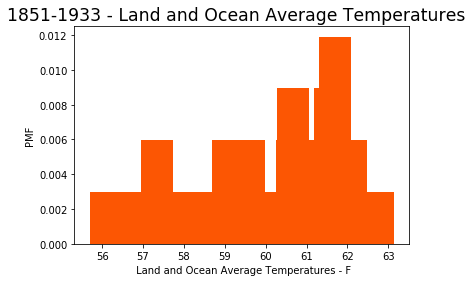

In [50]:
# Plot PMF for first group
plt.bar(wcycle1['value'], wcycle1['pmf'], color = '#fc5603')
plt.xlabel(" Land and Ocean Average Temperatures - F")
plt.ylabel("PMF")
plt.suptitle('1851-1933 - Land and Ocean Average Temperatures', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

Text(0.5, 0.95, '1934-2015 - Land and Ocean Average Temperatures')

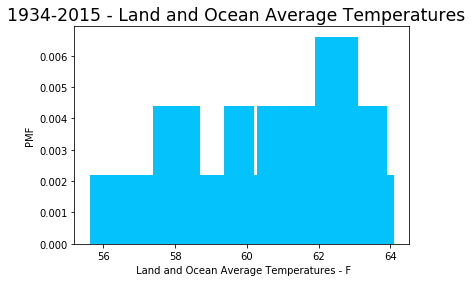

In [52]:
# Plot PMF for second group
plt.bar(wcycle2['value'], wcycle2['pmf'], color = '#03c2fc')
plt.xlabel(" Land and Ocean Average Temperatures - F")
plt.ylabel("PMF")
plt.suptitle('1934-2015 - Land and Ocean Average Temperatures', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

Text(0.5, 0.95, 'Storms by Year Comparison')

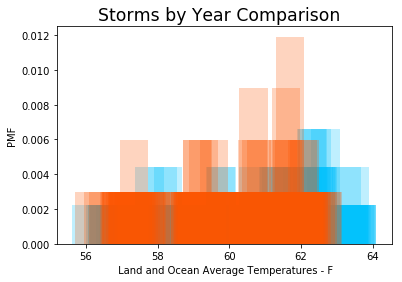

In [54]:
# Comparison between group 1 and 2
fig = plt.figure()
ax = fig.add_subplot(111)
plt.bar(wcycle2['value'], wcycle2['pmf'], color = '#03c2fc', alpha = 0.25)
plt.bar(wcycle1['value'], wcycle1['pmf'], color = '#fc5603', alpha = 0.25)
plt.xlabel(" Land and Ocean Average Temperatures - F")
plt.ylabel("PMF")
plt.suptitle('Storms by Year Comparison', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

From 1851 to 1933, a large number of observations had a high probability of occuring when the average Land and Ocean Temperature was higher than 60 degrees Fahrenheit. For observations occuring on or after 1934, the Probability does not reach the same levels as in the first group. This is something worth looking into.

_________________________________

### Cumulative Distribution Function

For this part, I decided to do two Cumulative Distribution Functions: One for the Maximum Wind strength and another for the length of Tropical Storms.

In [83]:
# Part I - Maximum Wind Strength for Tropical Storms
at_si = df_at.groupby(['ID']).mean()
at_si = df_days.reset_index()
at_si = at_si.filter(['Maximum Wind','count'], axis = 1)
at_si = at_si.groupby(['Maximum Wind']).sum()
at_si = at_si.reset_index()
at_si = at_si[at_si['Maximum Wind']>0]
at_si['pdf'] = at_si['count']/sum(at_si['count'])
at_si['cdf'] = at_si['pdf'].cumsum()

Text(0.5, 0.95, 'Cumulative Distribution Function - Winds')

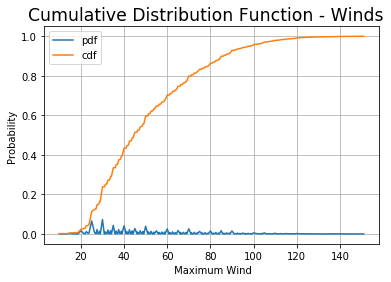

In [84]:
at_si.plot(x = 'Maximum Wind', y = ['pdf', 'cdf'], grid = True)
plt.xlabel(" Maximum Wind")
plt.ylabel("Probability")
plt.suptitle('Cumulative Distribution Function - Winds', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

In [86]:
# CDF for Storms that are 64 knots or higher in Wind Speed
at_si[at_si['Maximum Wind'] >= 33.7].head(1)

,Maximum Wind,count,pdf,cdf
51,33.75,210.0,0.016108,0.290328


This shows that 29.03 percentile of the observations in this dataset **do not** meet the criteria of Tropical Storm per the Saffir-Simpson scale (https://en.wikipedia.org/wiki/Saffir%E2%80%93Simpson_scale)

In [8]:
# Part II - Lenght of Storms (Days)

at_daysc = days_count.filter(['count'], axis = 1)
at_daysc = pd.DataFrame(at_daysc['count'].value_counts())
at_daysc = at_daysc.sort_index()
at_daysc = at_daysc.reset_index()
at_daysc['pdf'] = at_daysc['count']/sum(at_daysc['count'])
at_daysc['cdf'] = at_daysc['pdf'].cumsum()

Text(0.5, 0.95, 'Cumulative Distribution Function - Duration')

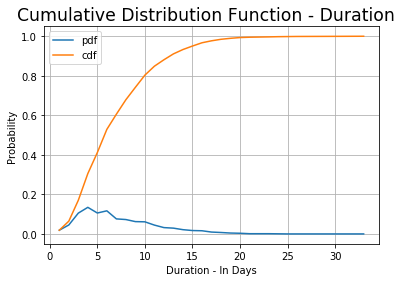

In [9]:
at_daysc.plot(x = 'index', y = ['pdf', 'cdf'], grid = True)
plt.xlabel("Duration - In Days")
plt.ylabel("Probability")
plt.suptitle('Cumulative Distribution Function - Duration', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

In [90]:
# CDF for Storms that last 10 days
at_daysc[at_daysc['index'] >= 10].head(1)

,index,count,pdf,cdf
9,10.0,112,0.061674,0.803414


Observations that lasted 10 days are fall under the 80 percentile. 

_________________________________

### Analytical Distribution

Here, I want to look at the normal distribution of storms/events/observations occur per year.

In [93]:
# Filter Year and ID from days_count dataframe, add a total column with a value of 1 and group by year.
at_epy = days_count.filter(['year','ID'], axis = 1)
at_epy = at_epy.drop_duplicates()
at_epy['totals'] = 1
at_epy = at_epy.groupby(['year']).sum()
at_epy = at_epy.reset_index()
at_epy.head()

,year,totals
0,1851,6
1,1852,5
2,1853,8
3,1854,5
4,1855,5


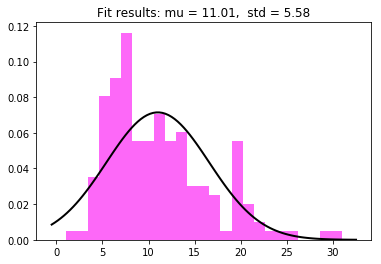

In [94]:
# Use norm from sci py to get the mean and standard deviation for the normal distribution
mu, std = norm.fit(at_epy['totals'])

# Plot the histogram.
plt.hist(at_epy['totals'], bins=25, density=True, alpha=0.6, color='#fc03f4')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

The normal distribution shows that the mean for storm durations is about 11 days with a standard deviation of about 5 days 

_________________________
###  Scatter Plots

First relationship to explore - Maximum Wind and Average Land and Ocean Temperatures:

In [101]:
df_atf =  df_at.filter(['ID','Date','Maximum Wind'], axis = 1)
df_atf['date'] = df_atf['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_atf['dt'] = df_atf['date'].values.astype('datetime64[M]')
df_atf = df_atf.groupby(['ID', 'dt']).mean()
df_atf = df_atf.reset_index()
df_atf = pd.merge(df_atf,
                 df_wtf[['dt','LandAverageTemperature_F', 'LandMaxTemperature_F', 'LandAndOceanAverageTemperature_F']],
                 on='dt', 
                 how='left')

Text(0.5, 0.95, 'Maximum Winds - Land/Ocean Avg Temp')

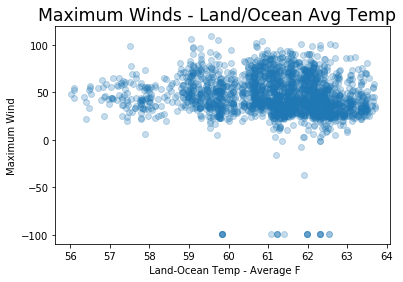

In [103]:
plt.scatter(df_atf['LandAndOceanAverageTemperature_F'],df_atf['Maximum Wind'],alpha=0.25)
plt.xlabel(" Land-Ocean Temp - Average F")
plt.ylabel("Maximum Wind")
plt.suptitle('Maximum Winds - Land/Ocean Avg Temp', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

In [104]:
#Next we calculate pearson's and spearman's correlation
pearson = pearsonr(df_atf['LandAndOceanAverageTemperature_F'], df_atf['Maximum Wind'])
spearman = spearmanr(df_atf['LandAndOceanAverageTemperature_F'], df_atf['Maximum Wind'])

print("Pearson's correlation: ", pearson,"\n","Spearman's correlation: ", spearman)

Pearson's correlation:  (-0.11262592248920522, 1.5371348757627914e-07) 
 Spearman's correlation:  SpearmanrResult(correlation=-0.1944064413709295, pvalue=7.717569776233492e-20)


Both Pearson's and Spearman's coeffecients indicate that there is a weak, negative correlation between Maximum Wind and the Average Land Temperature at *p  < 0.05*.

******
Next - Storm Duration (days) and Average Land and Ocean Temperatures:

In [105]:
df_atf2 =  df_at.filter(['ID','Date'], axis = 1)
df_atf2 = df_atf2.drop_duplicates()
df_atf2['date'] = df_atf2['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_atf2['dt'] = df_atf2['date'].values.astype('datetime64[M]')
df_atf2['count'] = 1
df_atf2 = df_atf2.groupby(['ID', 'dt']).sum()
df_atf2 = df_atf2.reset_index()
df_atf2 = pd.merge(df_atf2,
                 df_wtf[['dt','LandAverageTemperature_F', 'LandMaxTemperature_F', 'LandAndOceanAverageTemperature_F']],
                 on='dt', 
                 how='left')

Text(0.5, 0.95, 'Storm Duration - Land/Ocean Avg Temp')

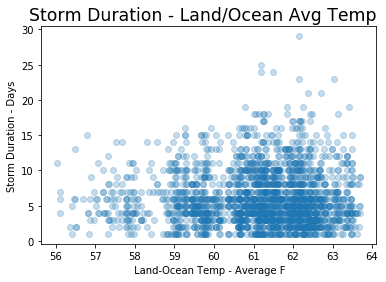

In [106]:
plt.scatter(df_atf2['LandAndOceanAverageTemperature_F'],df_atf2['count'],alpha=0.25)
plt.xlabel(" Land-Ocean Temp - Average F")
plt.ylabel("Storm Duration - Days")
plt.suptitle('Storm Duration - Land/Ocean Avg Temp', x=0.5, y= 0.95, ha='center', fontsize='xx-large')

In [107]:
pearson = pearsonr(df_atf2['LandAndOceanAverageTemperature_F'], df_atf2['count'])
spearman = spearmanr(df_atf2['LandAndOceanAverageTemperature_F'], df_atf2['count'])

print("Pearson's correlation: ", pearson,"\n","Spearman's correlation: ", spearman)

Pearson's correlation:  (0.017112029615489643, 0.42667568631473074) 
 Spearman's correlation:  SpearmanrResult(correlation=-0.023572563266569556, pvalue=0.2734852154545578)


Because p is greater than 0.05, I can discard the notion that there is a relationship between the the Average Land-Ocean Temperature and storm duration.

________________________________
### Hypothesis Testing

For this section, I used Excercise 8.1 as a reference to conduct the following tests:

In [108]:
# First we purge out Maximum Wind values under 0 as these are non captured. 
df_atfs = df_atf[df_atf['Maximum Wind']> 0]
df_atfs = df_atfs.reset_index()
n = len(df_atfs)
df_atfs['year'] = df_atfs['dt'].dt.year
df_atfs['cycle'] = df_atfs.apply(cat, axis=1)

In [109]:
# This function takes a dataframe and b-number of records in the dataframe. The function then does the 
# difference of means between the group 1 and group 2 and the Chi Square Test for the Land and Ocean Temperature
# average
def test(df, n):
    df1 = df[df.cycle == '1']
    df2 = df[df.cycle == '2']
    value_c1 = df1['Maximum Wind'].values
    value_c2 = df2['Maximum Wind'].values
    t1, p1 = ttest_ind(value_c1, value_c2)
    table = pd.crosstab(df['cycle'],df['LandAndOceanAverageTemperature_F'])
    stat, p2, dof, expected = chi2_contingency(table)
    print(f'Number of Samples: {n}\t Difference of Means:{p1}\t Chi-Square Test:{p2}')

In [110]:
for i in range(7):
    # Sample is being selected at random using 
    sample = df_atfs.sample(n)
    test(sample, n)
    n = int(n/2)

Number of Samples: 2134	 Difference of Means:1.141970759274777e-68	 Chi-Square Test:9.459483135616156e-122
Number of Samples: 1067	 Difference of Means:1.5805829459695772e-38	 Chi-Square Test:6.343586469794594e-30
Number of Samples: 533	 Difference of Means:6.712596904114102e-18	 Chi-Square Test:2.0759647447178326e-06
Number of Samples: 266	 Difference of Means:2.523388936713819e-12	 Chi-Square Test:0.008901858822404468
Number of Samples: 133	 Difference of Means:9.938973721552628e-05	 Chi-Square Test:0.2787180390703967
Number of Samples: 66	 Difference of Means:7.620909086088289e-07	 Chi-Square Test:0.340193399824705
Number of Samples: 33	 Difference of Means:0.24937839884524896	 Chi-Square Test:0.4180195006078752


As the sample size is reduced, the p-values of these tests grows, indicating that these events can actually occur by chance. 

_____________________

### Regression
For this last section, I attempted to create a model that could potentially estimate the number of that could occur in a given year by going off the predicted average Maximum Winds and the yearly averaged Land-Ocean Temperature. Since we are going for a count, then the best option is going to be a Poisson model.

In [123]:
# First we filter the count of days:
day_filter = days_count.filter(['ID','year','count'], axis = 1)
day_filter['total'] = 1
day_filter = day_filter.rename(columns = {'count':'duration_days'})
day_filter = day_filter.groupby(['year']).sum()
day_filter = day_filter.reset_index()

In [124]:
# Next the Maximum Wind:
wind_filter = df_at.filter(['Date','Maximum Wind'], axis = 1)
wind_filter = wind_filter.rename(columns = {'Maximum Wind':'Max_Wind'})
wind_filter['dt'] = wind_filter['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
wind_filter['year'] = wind_filter['dt'].dt.year
wind_filter = wind_filter.groupby(['year']).mean()
wind_filter = wind_filter.reset_index()

In [125]:
# Next, the LandAndOceanTemperature
wth_filter = df_wtf.filter(['dt', 'LandAndOceanAverageTemperature_F'], axis = 1)
wth_filter['year'] = wth_filter['dt'].dt.year
wth_filter = wth_filter.groupby(['year']).mean()
wth_filter = wth_filter.reset_index()

In [126]:
# left joining day_filter and wind_filter
merge_1 = pd.merge(day_filter,
                 wind_filter[['year','Max_Wind']],
                 on='year', 
                 how='left')

In [130]:
# final left join to wth_filter
results = pd.merge(merge_1,
                 wth_filter[['year','LandAndOceanAverageTemperature_F']],
                 on='year', 
                 how='left')

In [128]:
results.head()

,year,duration_days,total,Max_Wind,LandAndOceanAverageTemperature_F
0,1851,26.0,6,59.897959,61.23884
1,1852,34.0,5,72.462687,60.66920
2,1853,29.0,8,84.100000,60.56300
3,1854,16.0,5,70.833333,61.01105
4,1855,11.0,5,71.142857,61.26260


In [131]:
formula='total ~ Max_Wind + LandAndOceanAverageTemperature_F + duration_days'
model = smf.poisson(formula, data=results)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 2.324027
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                  total   No. Observations:                  165
Model:                        Poisson   Df Residuals:                      161
Method:                           MLE   Df Model:                            3
Date:                Sat, 16 Nov 2019   Pseudo R-squ.:                  0.3185
Time:                        18:43:27   Log-Likelihood:                -383.46
converged:                       True   LL-Null:                       -562.65
                                        LLR p-value:                 2.302e-77
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            2.3861      2.231      1.070      0.285      -1.987       6.759
Max_Wind                            -0.0071      0.002     -3.627      0.000      -0.011      -0.003
LandAndOceanAverageTemperature_F    -0.0059      0.037     -0.162      0.871      -0.078       0.066
duration_days                        0.0083      0.001     16.544      0.000       0.007       0.009
====================================================================================================
"""

In [134]:
# Testing the model
columns = ['Max_Wind', 'LandAndOceanAverageTemperature_F', 'duration_days']
new = pd.DataFrame([[60, 61, 26]], columns=columns)
results.predict(new)

0    6.154642
dtype: float64

The result provided above matches with the first record provided in the dataframe. 